In [1]:
import pandas as pd

In [2]:
Response = pd.read_csv('Emergency_Response.csv')

In [3]:
Response

,Distance_km,Traffic_Density,Road_Type,Time_of_Day,Day_of_Week,Weather,Num_Traffic_Signals,Speed_Limit_kmph,Incident_Type,Population_Density_per_km2,Response_Time_minutes
0,1.41,Low,Secondary,Evening,Fri,Rain,6,50,Other,359,3.24
1,9.03,Low,Primary,Afternoon,Mon,Clear,4,40,Medical,1538,12.83
2,3.95,Low,Primary,Night,Thu,Clear,3,50,Other,3949,6.65
3,2.74,Medium,Secondary,Morning,Wed,Clear,2,70,Fire,7134,3.35
4,0.51,Medium,Secondary,Evening,Fri,Rain,3,60,Fire,5993,1.00
...,...,...,...,...,...,...,...,...,...,...,...
9995,5.85,High,Residential,Evening,Fri,Clear,4,60,Other,4990,15.30
9996,6.83,Low,Secondary,Evening,Thu,Clear,2,60,Other,6400,10.44
9997,8.80,Low,Primary,Afternoon,Tue,Clear,3,60,Fire,5875,9.90
9998,1.52,Low,Secondary,Afternoon,Mon,Clear,1,70,Medical,1519,2.62


from ydata_profiling import ProfileReport 

profile = ProfileReport(Response,title='Emergency Response ')

profile.to_notebook_iframe()

profile.to_file('Emergency_Response.html')

In [4]:
Response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Distance_km                 10000 non-null  float64
 1   Traffic_Density             10000 non-null  object 
 2   Road_Type                   10000 non-null  object 
 3   Time_of_Day                 10000 non-null  object 
 4   Day_of_Week                 10000 non-null  object 
 5   Weather                     10000 non-null  object 
 6   Num_Traffic_Signals         10000 non-null  int64  
 7   Speed_Limit_kmph            10000 non-null  int64  
 8   Incident_Type               10000 non-null  object 
 9   Population_Density_per_km2  10000 non-null  int64  
 10  Response_Time_minutes       10000 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [5]:
Response.isnull().sum()

Distance_km                   0
Traffic_Density               0
Road_Type                     0
Time_of_Day                   0
Day_of_Week                   0
Weather                       0
Num_Traffic_Signals           0
Speed_Limit_kmph              0
Incident_Type                 0
Population_Density_per_km2    0
Response_Time_minutes         0
dtype: int64

In [6]:
Response.duplicated().sum()

np.int64(0)

In [7]:
for col in Response.columns:
    print(col)
    print(Response[col].unique())

Distance_km
[ 1.41  9.03  3.95 ...  6.66 22.83  9.44]
Traffic_Density
['Low' 'Medium' 'High']
Road_Type
['Secondary' 'Primary' 'Residential']
Time_of_Day
['Evening' 'Afternoon' 'Night' 'Morning']
Day_of_Week
['Fri' 'Mon' 'Thu' 'Wed' 'Sun' 'Sat' 'Tue']
Weather
['Rain' 'Clear' 'Snow' 'Fog']
Num_Traffic_Signals
[ 6  4  3  2  5  1  0  7  9  8 10 11]
Speed_Limit_kmph
[50 40 70 60 30]
Incident_Type
['Other' 'Medical' 'Fire' 'Crime']
Population_Density_per_km2
[  359  1538  3949 ...  6400  1519 10086]
Response_Time_minutes
[ 3.24 12.83  6.65 ... 14.57 38.08  8.3 ]


In [8]:
Response['Response_Time_minutes'].min() 

1.0

In [9]:
Response['Response_Time_minutes'].max() 

55.77

# Data Understanding

In [10]:
category = Response.select_dtypes(include='object')
category

,Traffic_Density,Road_Type,Time_of_Day,Day_of_Week,Weather,Incident_Type
0,Low,Secondary,Evening,Fri,Rain,Other
1,Low,Primary,Afternoon,Mon,Clear,Medical
2,Low,Primary,Night,Thu,Clear,Other
3,Medium,Secondary,Morning,Wed,Clear,Fire
4,Medium,Secondary,Evening,Fri,Rain,Fire
...,...,...,...,...,...,...
9995,High,Residential,Evening,Fri,Clear,Other
9996,Low,Secondary,Evening,Thu,Clear,Other
9997,Low,Primary,Afternoon,Tue,Clear,Fire
9998,Low,Secondary,Afternoon,Mon,Clear,Medical


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

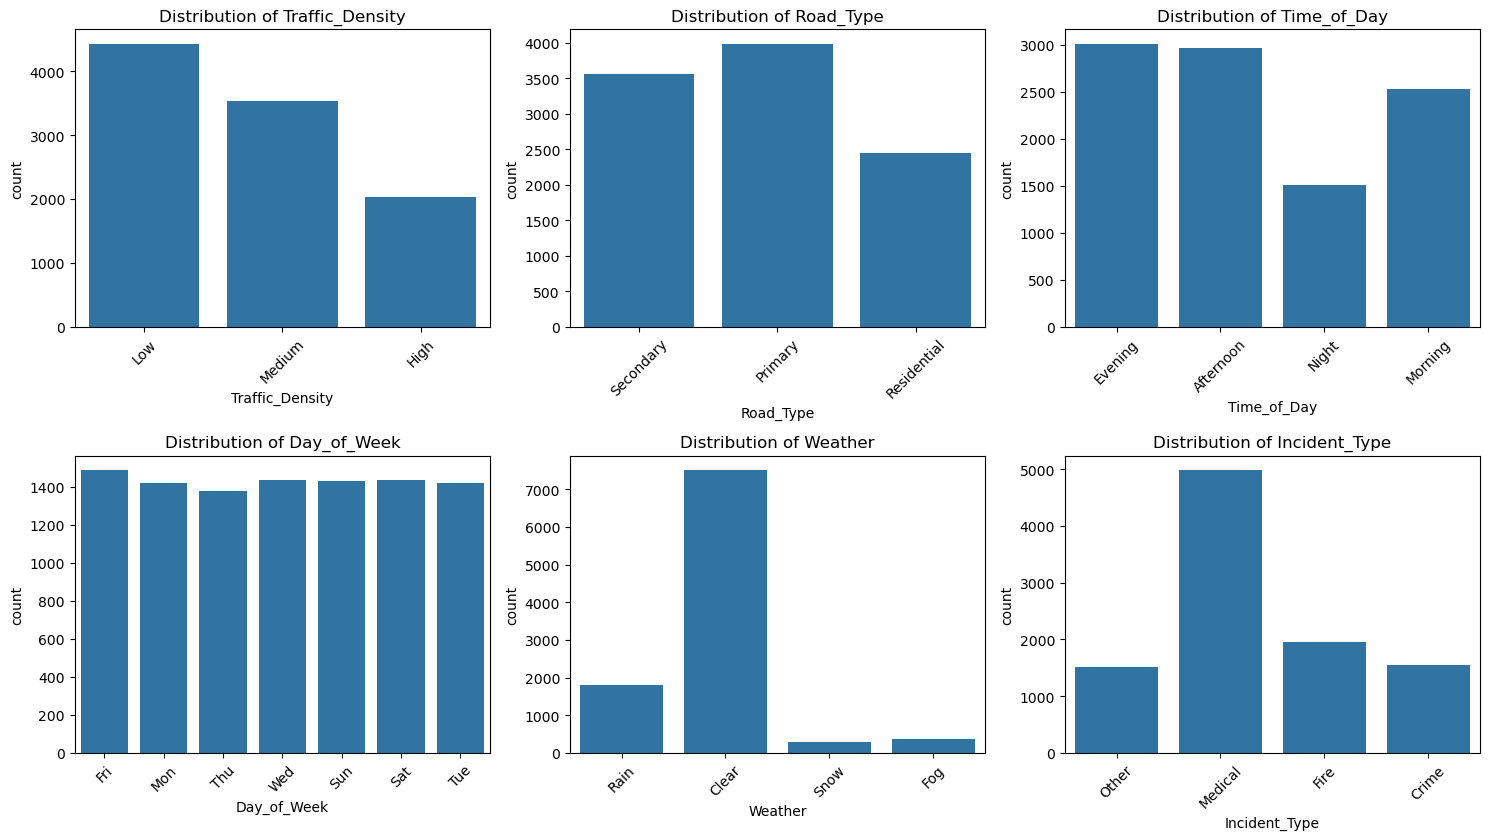

In [12]:
plt.figure(figsize=(15,12))
cols = ['Traffic_Density', 'Road_Type', 'Time_of_Day', 
        'Day_of_Week', 'Weather', 'Incident_Type']

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=Response)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


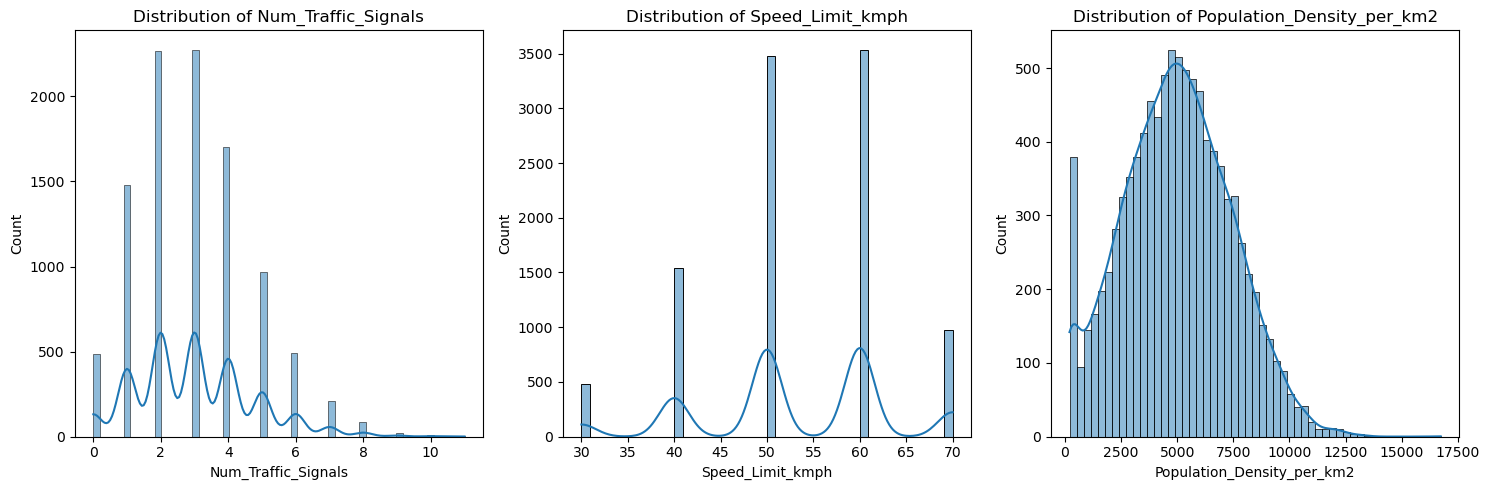

In [13]:
plt.figure(figsize=(15,5))
number = ['Num_Traffic_Signals','Speed_Limit_kmph','Population_Density_per_km2']
for i, col in enumerate(number, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=col, data=Response,kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


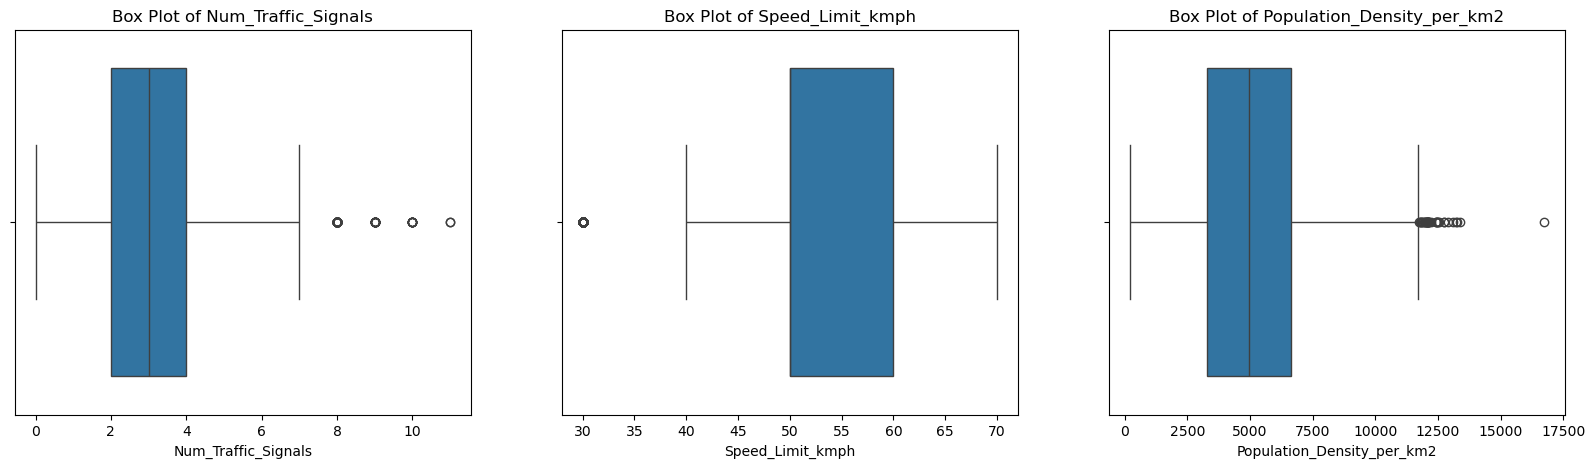

In [14]:
plt.figure(figsize=(20,5))
for i,col in enumerate(number,1):
    plt.subplot(1, 3, i)
    plt.title(f'Box Plot of {col}')
    sns.boxplot(x=col,data=Response)
plt.show()
    

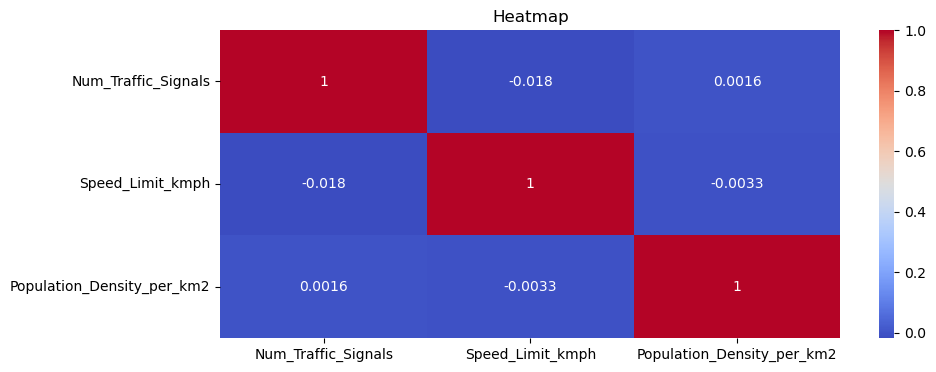

In [15]:
plt.figure(figsize=(10,4))
plt.title('Heatmap')
sns.heatmap(Response.select_dtypes(include='int').corr(),annot=True,cmap='coolwarm')
plt.show()

# Feature Encoding

In [16]:
Traffic_Density = pd.get_dummies(Response['Traffic_Density'],dtype=int)

In [17]:
Traffic_Density

,High,Low,Medium
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
9995,1,0,0
9996,0,1,0
9997,0,1,0
9998,0,1,0


In [18]:
Response=pd.concat([Response,Traffic_Density],axis=1)

In [19]:
Response.drop(columns='Traffic_Density',inplace=True)

In [20]:
Road_Type = pd.get_dummies(Response['Road_Type'],dtype=int)

In [21]:
Road_Type

,Primary,Residential,Secondary
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
9995,0,1,0
9996,0,0,1
9997,1,0,0
9998,0,0,1


In [22]:
Response=pd.concat([Response,Road_Type],axis=1)

In [23]:
Response.head()

,Distance_km,Road_Type,Time_of_Day,Day_of_Week,Weather,Num_Traffic_Signals,Speed_Limit_kmph,Incident_Type,Population_Density_per_km2,Response_Time_minutes,High,Low,Medium,Primary,Residential,Secondary
0,1.41,Secondary,Evening,Fri,Rain,6,50,Other,359,3.24,0,1,0,0,0,1
1,9.03,Primary,Afternoon,Mon,Clear,4,40,Medical,1538,12.83,0,1,0,1,0,0
2,3.95,Primary,Night,Thu,Clear,3,50,Other,3949,6.65,0,1,0,1,0,0
3,2.74,Secondary,Morning,Wed,Clear,2,70,Fire,7134,3.35,0,0,1,0,0,1
4,0.51,Secondary,Evening,Fri,Rain,3,60,Fire,5993,1.00,0,0,1,0,0,1


In [24]:
Response.drop(columns='Road_Type',inplace=True)

In [25]:
Time_of_Day = pd.get_dummies(Response['Time_of_Day'],dtype=int)

In [26]:
Time_of_Day

,Afternoon,Evening,Morning,Night
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
9995,0,1,0,0
9996,0,1,0,0
9997,1,0,0,0
9998,1,0,0,0


In [27]:
Response=pd.concat([Response,Time_of_Day],axis=1)

In [28]:
Response.drop(columns='Time_of_Day',inplace=True)

In [29]:
Day_of_Week = pd.get_dummies(Response['Day_of_Week'],dtype=int)

In [30]:
Day_of_Week

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0
9996,0,0,0,0,1,0,0
9997,0,0,0,0,0,1,0
9998,0,1,0,0,0,0,0


In [31]:
Response=pd.concat([Response,Day_of_Week],axis=1)

In [32]:
Response.drop(columns='Day_of_Week',inplace=True)

In [33]:
Weather = pd.get_dummies(Response['Weather'],dtype=int)

In [34]:
Weather

,Clear,Fog,Rain,Snow
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
9995,1,0,0,0
9996,1,0,0,0
9997,1,0,0,0
9998,1,0,0,0


In [35]:
Response=pd.concat([Response,Weather],axis=1)

In [36]:
Response.drop(columns='Weather',inplace=True)

In [37]:
Incident_Type = pd.get_dummies(Response['Incident_Type'],dtype=int)

In [38]:
Incident_Type

,Crime,Fire,Medical,Other
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
9995,0,0,0,1
9996,0,0,0,1
9997,0,1,0,0
9998,0,0,1,0


In [39]:
Response=pd.concat([Response,Incident_Type],axis=1)

In [40]:
Response.drop(columns='Incident_Type',inplace=True)

In [41]:
Response.head()

,Distance_km,Num_Traffic_Signals,Speed_Limit_kmph,Population_Density_per_km2,Response_Time_minutes,High,Low,Medium,Primary,Residential,...,Tue,Wed,Clear,Fog,Rain,Snow,Crime,Fire,Medical,Other
0,1.41,6,50,359,3.24,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,9.03,4,40,1538,12.83,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,3.95,3,50,3949,6.65,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,2.74,2,70,7134,3.35,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
4,0.51,3,60,5993,1.00,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
Response['Distance_km'] = StandardScaler().fit_transform(Response[['Distance_km']])

In [44]:
Response['Speed_Limit_kmph'] = StandardScaler().fit_transform(Response[['Speed_Limit_kmph']])

In [45]:
Response['Population_Density_per_km2'] = StandardScaler().fit_transform(Response[['Population_Density_per_km2']])

In [46]:
Response.head()

,Distance_km,Num_Traffic_Signals,Speed_Limit_kmph,Population_Density_per_km2,Response_Time_minutes,High,Low,Medium,Primary,Residential,...,Tue,Wed,Clear,Fog,Rain,Snow,Crime,Fire,Medical,Other
0,-0.520831,6,-0.297719,-1.915109,3.24,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2.086015,4,-1.297781,-1.427303,12.83,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0.348118,3,-0.297719,-0.429763,6.65,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.065830,2,1.702407,0.888017,3.35,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
4,-0.828726,3,0.702344,0.415933,1.00,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [47]:
x = Response.drop(columns='Response_Time_minutes')
y = Response['Response_Time_minutes']

In [59]:
x.columns

Index(['Distance_km', 'Num_Traffic_Signals', 'Speed_Limit_kmph',
       'Population_Density_per_km2', 'High', 'Low', 'Medium', 'Primary',
       'Residential', 'Secondary', 'Afternoon', 'Evening', 'Morning', 'Night',
       'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Clear', 'Fog', 'Rain',
       'Snow', 'Crime', 'Fire', 'Medical', 'Other'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [50]:
x_train.shape

(8000, 29)

In [51]:
x_test.shape

(2000, 29)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

In [54]:
model.fit(x_train,y_train)

LinearRegression()

In [55]:
model.score(x_train,y_train)

0.8535477289047593

In [56]:
model.score(x_test,y_test)

0.8599729988874144

In [57]:
import pickle

In [58]:
filename = 'model_emergency_one_hot.sav'
pickle.dump(model,open(filename,'wb'))